In [36]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from analysis_parameters import *
from sympy import S, symbols, expand, Symbol
import sympy
import matplotlib.ticker as mticker
# Enter in data

# Enter in values from our simulations
dr_actual =  np.array([0.6,1.0,1.5,2.0,2.5,3.0]) # values used in our simulations

n_crowd_vox = np.array([1970.0, 2096.0, 1791.0, 1418.0, 1090.0, 820.0]) # crowders per voxel
n_rib_vox = np.array([3.5431368807732677, 7.83939708791492, 9.053235633635463,
         8.728526590655443, 8.013776336457527, 7.258097524079424])
n_tern_vox = 42

# E. coli cell data for extrapolation beyond our experimental data:
# Ribosomes
dr_rib = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
n_rib = np.array([8000,15000,26000,44000,61000,73000])
n_rib = np.array([int(n_i*0.85) for n_i in n_rib])

# Ternary complexes
dr_tern = np.array([0.4,0.7,1.07,1.6,2.5,3.0]+[0.4]*5)
n_tern = np.array([48000,57000,83000,143000,323000,383000]+[48000]*5)

# Number of crowders
dr_crowd = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
n_crowd = 1e6*np.array([2.66, 4.3, 5.9, 7.02, 7.65, 7.78])

#Cell mass
dr_mass = np.array([0.6,1.0,1.5,2.0,2.5,3.0])
mass_cell = np.array([159,257,370,512,607,636])

# Cell Volume
dr_vol = np.array([0.25,0.42,0.56,0.58,0.68,0.71,0.87,1.81,1.85,2.15,2.3])
V_cell = np.array([1.14,1.44,1.74,1.26,1.11,1.38,1.44,2.15,2.34,2.46,2.4])

# Nucleoid volume
dr_nuc = np.array([0.4,1.36,2.85])
phi_nuc = np.array([0.17,0.13,0.11])


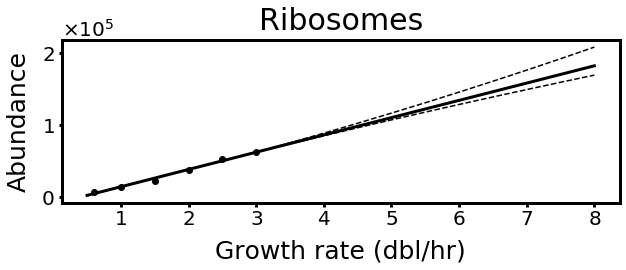

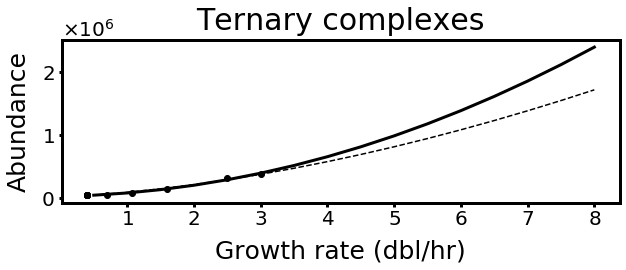

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


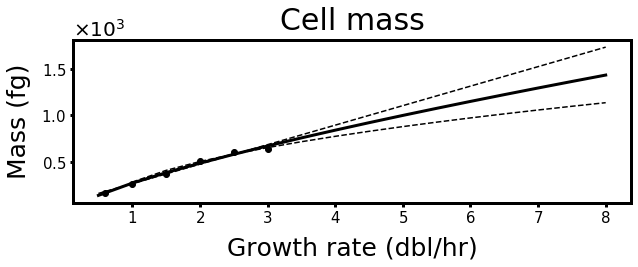

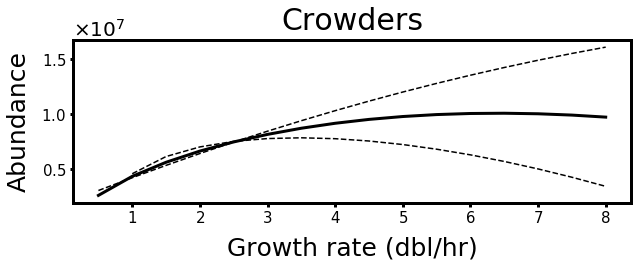

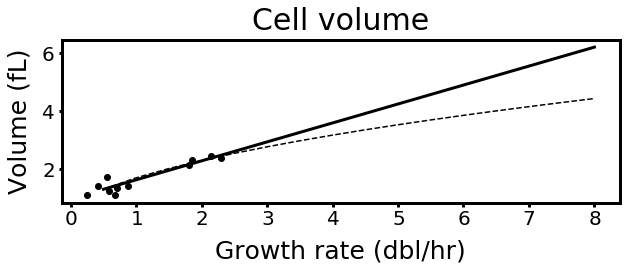

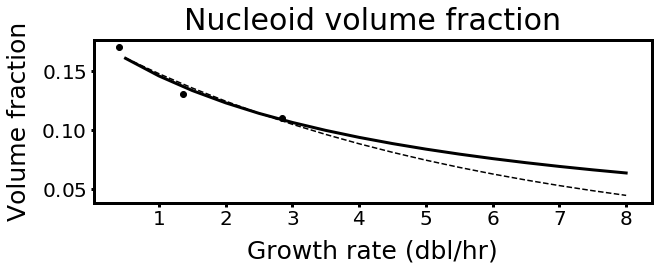

In [60]:
# Perform fits for extrapolation and plot

dr_plot = np.arange(0.5, 8.2, .5) # dr range to plot
plt.rcParams['axes.linewidth'] = 3
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.limits"] = (-3,3)
plt.rcParams["axes.formatter.use_mathtext"] = True


# Ribosome
p_rib = np.polynomial.polynomial.polyfit(dr_rib, n_rib, 1)
n_rib_pred = np.polynomial.polynomial.polyval(dr_plot, p_rib)
n_rib_up = copy.copy(n_rib_pred)
n_rib_down = copy.copy(n_rib_pred)
val = .2/7
for i in range(len(n_rib_pred)):
    if dr_plot[i] > 3:
        dist = dr_plot[i] - 3
        n_rib_up[i] = (1 + dist*val)*n_rib_pred[i]
        n_rib_down[i] = (1 - .5*dist*val)*n_rib_pred[i]
        
plt.plot(dr_rib, n_rib, 'o', color='black',linewidth=3)
plt.plot(dr_plot, n_rib_pred, color='black',linewidth=3)
plt.plot(dr_plot, n_rib_up, '--', color='black')
plt.plot(dr_plot, n_rib_down, '--', color='black')
plt.ylabel('Abundance',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Ribosomes',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
ax = plt.gca() # Gets the current axis object
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.show()

# Ternary complex
p_tern = np.polynomial.polynomial.polyfit(dr_tern, n_tern, 2)
n_tern_pred = np.polynomial.polynomial.polyval(dr_plot, p_tern)
n_tern_scaled = n_tern**(1/1.75)
p_tern2 = np.polynomial.polynomial.polyfit(dr_tern, n_tern_scaled, 1)
n_tern_pred2 = np.polynomial.polynomial.polyval(dr_plot, p_tern2)**1.75
plt.plot(dr_tern, n_tern, 'o', color='black',linewidth=3)
plt.plot(dr_plot, n_tern_pred, color='black',linewidth=3)
plt.plot(dr_plot, n_tern_pred2, '--', color='black')
plt.ylabel('Abundance',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Ternary complexes',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
ax = plt.gca() # Gets the current axis object
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.show()

# Crowder, use the fit of mass
#p_crowd = np.polynomial.polynomial.polyfit(dr_crowd, np.log(7.8e6 - n_crowd), 1)
#n_crowd_pred = 8e6 - np.exp(np.polynomial.polynomial.polyval(dr_plot, p_crowd))
#p_crowd2 = np.polynomial.polynomial.polyfit(dr_crowd, n_crowd**(2), 1)
#n_crowd_pred2 = np.polynomial.polynomial.polyval(dr_plot, p_crowd2)**(1/2)
p_mass = np.polynomial.polynomial.polyfit(dr_crowd, mass_cell**(4/3), 1)
mass_cell_pred = np.polynomial.polynomial.polyval(dr_plot, p_mass)**(3/4)
p_mass2 = np.polynomial.polynomial.polyfit(dr_crowd, mass_cell, 1)
mass_cell_pred2 = np.polynomial.polynomial.polyval(dr_plot, p_mass2)
p_mass3 = np.polynomial.polynomial.polyfit(dr_crowd, mass_cell**2, 1)
mass_cell_pred3 = np.polynomial.polynomial.polyval(dr_plot, p_mass3)**(1/2)
plt.plot(dr_mass, mass_cell, 'o',  color='black')
plt.plot(dr_plot, mass_cell_pred, color='black',linewidth=3)
plt.plot(dr_plot, mass_cell_pred2,'--',color='black')
plt.plot(dr_plot, mass_cell_pred3,'--',color='black')
plt.ylabel('Mass (fg)',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Cell mass',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=15)
ax = plt.gca() # Gets the current axis object
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.show()


rib_mass = 2300*1.66054e-21*10**15
tern_mass = 69*1.66054e-21*10**15
mass_crowder_pred = mass_cell_pred - rib_mass*n_rib_pred - tern_mass*n_tern_pred
mass_crowder_pred2 = mass_cell_pred2 - rib_mass*n_rib_pred - tern_mass*n_tern_pred
mass_crowder_pred3 = mass_cell_pred3 - rib_mass*n_rib_pred - tern_mass*n_tern_pred
PROTEIN_DENSITY = 1.41 #g/cm^3
CROWDER_RAD = 0.0020
crowd_mass = ((4/3)*np.pi*(CROWDER_RAD**3))*10**-12*PROTEIN_DENSITY*10**15 # single crowder
n_crowd_pred = mass_crowder_pred/crowd_mass
n_crowd_pred2 = mass_crowder_pred2/crowd_mass
n_crowd_pred3 = mass_crowder_pred3/crowd_mass
#plt.plot(dr_crowd, n_crowd, 'o',  color='black')
plt.plot(dr_plot, n_crowd_pred, color='black',linewidth=3)
plt.plot(dr_plot, n_crowd_pred2,'--',color='black')
plt.plot(dr_plot, n_crowd_pred3,'--',color='black')
plt.ylabel('Abundance',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Crowders',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=15)
ax = plt.gca() # Gets the current axis object
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.show()



# Cell volume
p_vol = np.polynomial.polynomial.polyfit(dr_vol,V_cell, 1)
V_cell_pred = np.polynomial.polynomial.polyval(dr_plot, p_vol)
p_vol2 = np.polynomial.polynomial.polyfit(dr_vol,V_cell**2, 1)
V_cell_pred2 = np.sqrt(np.polynomial.polynomial.polyval(dr_plot, p_vol2))
plt.plot(dr_vol, V_cell, 'o', color='black',linewidth=3)
plt.plot(dr_plot, V_cell_pred, color='black',linewidth=3)
plt.plot(dr_plot, V_cell_pred2, '--', color='black')
plt.ylabel('Volume (fL)',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Cell volume',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
ax = plt.gca() # Gets the current axis object
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.show()


# Nucleoid volume fraction
p_nuc = np.polynomial.polynomial.polyfit(dr_nuc,phi_nuc**-1, 1)
phi_nuc_pred = 1/np.polynomial.polynomial.polyval(dr_plot, p_nuc)
p_nuc2 = np.polynomial.polynomial.polyfit(dr_nuc, np.log(phi_nuc), 1)
phi_nuc_pred2 = np.exp(np.polynomial.polynomial.polyval(dr_plot, p_nuc2))
plt.plot(dr_nuc, phi_nuc, 'o', color='black',linewidth=3)
plt.plot(dr_plot, phi_nuc_pred, color='black',linewidth=3)
plt.plot(dr_plot, phi_nuc_pred2, '--', color='black')
plt.ylabel('Volume fraction',size=25,labelpad=10)
plt.xlabel('Growth rate (dbl/hr)',size=25,labelpad=10)
plt.title('Nucleoid volume fraction',fontsize=30,pad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
ax = plt.gca() # Gets the current axis object
text = ax.yaxis.get_offset_text() # Get the text object
text.set_size(20) # # Set the size.
plt.show()

In [62]:
# This function takes in the extrapolated raw numbers of each species and calculates relevant
# parameters, including the species and total volume fractions and the ratios of different 
# species and amount in a voxel.
def calc_values(n_rib_pred, n_tern_pred, n_crowd_pred, V_cell_pred, phi_nuc_pred):
    
    # Volume and amount of species in cytoplasm
    V_cyto = V_cell_pred*(1-phi_nuc_pred) # volume of cytoplasm
    n_rib_cyto = n_rib_pred # assume ribosomes are excluded from the nucleoid region
    n_tern_cyto = n_tern_pred*(1-phi_nuc_pred)
    n_crowd_cyto = n_crowd_pred*(1-phi_nuc_pred)
    
    # Voxel parameters and ratios:
    rib_vox = 42*n_rib_cyto/n_tern_cyto
    crowd_vox = 42*n_crowd_cyto/n_tern_cyto
    ratio_cr = n_crowd_cyto/n_rib_cyto
    ratio_tr = n_tern_cyto/n_rib_cyto
    
    # Size of each species:
    r_rib = 0.01305 # radius in um (note um**3 is same as fL)
    r_tern = 0.0059
    r_crowd = 0.002
    
    # Volume taken up by each species
    V_rib = n_rib_cyto*(4/3)*np.pi*r_rib**3
    V_tern = n_tern_cyto*(4/3)*np.pi*r_tern**3
    V_crowd = n_crowd_cyto*(4/3)*np.pi*r_crowd**3
    
    # Volume fractions
    phi_rib = V_rib/V_cyto
    phi_tern = V_tern/V_cyto
    phi_crowd = V_crowd/V_cyto
    phi_tot = phi_rib + phi_tern + phi_crowd
    
    # Volume of voxel
    V_vox = 42*(4/3)*np.pi/phi_tern # unitless, normalized by r_tern

    return phi_rib, phi_tern, phi_crowd, phi_tot, rib_vox, crowd_vox, ratio_cr, ratio_tr, V_vox

In [63]:
# Before we calculate the bounds, let's calculate the relevant voxel values for 
# the primary extrapolation.

phi_rib, phi_tern, phi_crowd, phi_tot, rib_vox, crowd_vox, ratio_cr, ratio_tr, V_vox = calc_values(n_rib_pred, n_tern_pred, n_crowd_pred, V_cell_pred, phi_nuc_pred)

In [129]:
# Now, we want to calculate upper and lower bounds to the plots.  First, we need to concaconate
# the values being tested into arrays.

n_rib_ext = np.array([n_rib_down, n_rib_up])
n_tern_ext = np.array([n_tern_pred, n_tern_pred2])
n_crowd_ext = np.array([n_crowd_pred, n_crowd_pred2])
V_cell_ext = np.array([V_cell_pred, V_cell_pred2])
phi_nuc_ext = np.array([phi_nuc_pred, phi_nuc_pred2])

params = [[1, 1, 1, 1, 1], [1, 1, 1, 1, 2], [1, 1, 2, 1, 1], [1, 2, 1, 1, 1], [2, 1, 1, 1, 1],
          [2, 1, 1, 1, 2], [2, 1, 2, 1, 1], [2, 2, 1, 1, 1], [1, 2, 2, 1, 1], [2, 2, 2, 2, 2]]
params = []
for ii in range(2):
    for jj in range(2):
        for kk in range(2):
            for ll in range(2):
                for mm in range(2):
                    param = [ii, jj, kk, ll, mm]
                    params.append(param)
idx = 0

# Loop through all the sets of parameters above and store in one array.
for paramset in params:
    idx0 = paramset[0]-1
    idx1 = paramset[1]-1
    idx2 = paramset[2]-1
    idx3 = paramset[3]-1
    idx4 = paramset[4]-1
    
    temp = calc_values(n_rib_ext[idx0], n_tern_ext[idx1], n_crowd_ext[idx2], V_cell_ext[idx3], phi_nuc_ext[idx4])

    if idx == 0: # initialize
        phi_rib_temp = temp[0]
        phi_tern_temp = temp[1]
        phi_crowd_temp = temp[2]
        phi_tot_temp = temp[3]
        rib_vox_temp = temp[4]
        crowd_vox_temp = temp[5]
        ratio_cr_temp = temp[6]
        ratio_tr_temp = temp[7]
        V_vox_temp = temp[8]
        

    else: # concaconate
        phi_rib_temp = np.vstack((phi_rib_temp, temp[0]))
        phi_tern_temp = np.vstack((phi_tern_temp, temp[1]))
        phi_crowd_temp = np.vstack((phi_crowd_temp, temp[2]))
        phi_tot_temp = np.vstack((phi_tot_temp, temp[3]))
        rib_vox_temp = np.vstack((rib_vox_temp, temp[4]))
        crowd_vox_temp = np.vstack((crowd_vox_temp, temp[5]))
        ratio_cr_temp = np.vstack((ratio_cr_temp, temp[6]))
        ratio_tr_temp = np.vstack((ratio_tr_temp, temp[7]))
        V_vox_temp = np.vstack((V_vox_temp, temp[8]))

    idx += 1
    
# Find maximum and minimum of each variable:
phi_rib_max = np.max(phi_rib_temp,axis=0)   
phi_rib_max = np.max(phi_rib_temp, axis=0)
phi_tern_max = np.max(phi_tern_temp, axis=0)
phi_crowd_max = np.max(phi_crowd_temp, axis=0)
phi_tot_max = np.max(phi_tot_temp, axis=0)
rib_vox_max = np.max(rib_vox_temp, axis=0)
crowd_vox_max = np.max(crowd_vox_temp, axis=0)
ratio_cr_max = np.max(ratio_cr_temp, axis=0)
ratio_tr_max = np.max(ratio_tr_temp, axis=0)
V_vox_max = np.max(V_vox_temp, axis=0)

phi_rib_min = np.min(phi_rib_temp,axis=0)   
phi_rib_min = np.min(phi_rib_temp, axis=0)
phi_tern_min = np.min(phi_tern_temp, axis=0)
phi_crowd_min = np.min(phi_crowd_temp, axis=0)
phi_tot_min = np.min(phi_tot_temp, axis=0)
rib_vox_min = np.min(rib_vox_temp, axis=0)
crowd_vox_min = np.min(crowd_vox_temp, axis=0)
ratio_cr_min = np.min(ratio_cr_temp, axis=0)
ratio_tr_min = np.min(ratio_tr_temp, axis=0)
V_vox_min = np.min(V_vox_temp, axis=0)
    

In [125]:
phi_tot_max

array([0.12530428, 0.22975606, 0.3026359 , 0.3538906 , 0.40274056,
       0.45215224, 0.5022056 , 0.55063178, 0.59787262, 0.6442373 ,
       0.68995006, 0.73517815, 0.7800491 , 0.82466194, 0.86909468,
       0.91340956])

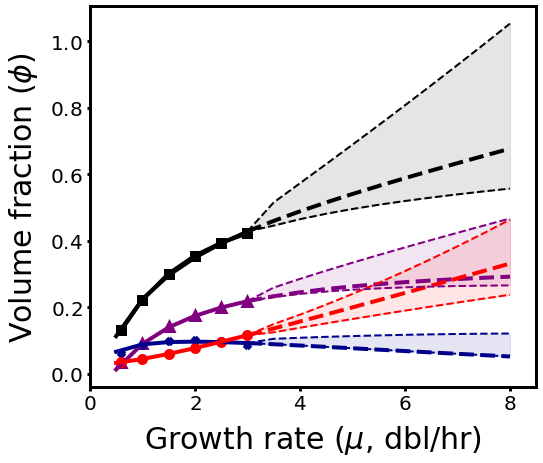

In [130]:
# Plot the values

# Values from our simulations:
phi_rib_actual = np.array([0.0321522741565134,0.0909471442874548,0.140978112775076,
                           0.175335729248951,0.199905287115802,0.217971630008904])
phi_tern_actual =  np.array([0.0352206653600450,0.0450277445851937,0.0604396107494565,
                             0.0779656448023790,0.0968190581820406,0.116560382212636])
phi_crowd_actual =  np.array([0.0643499840914683,0.0875298398622069,0.100392647231079,
                              0.102533118751904,0.0978750536867374,0.0886440269099349])
phi_tot_actual = phi_rib_actual + phi_tern_actual + phi_crowd_actual

plt.plot(dr_actual,phi_tot_actual,label=r'$\mathregular{\phi_{ vox}}$',color='black',
         marker='s',markersize=6,markeredgewidth=5,linewidth=4)
plt.plot(dr_actual,phi_rib_actual,label=r'$\mathregular{\phi_{ rib}}$',color='purple',
         marker='^',markersize=6,markeredgewidth=5,linewidth=0)
plt.plot(dr_actual,phi_crowd_actual,label=r'$\mathregular{\phi_{ crowd}}$',color='darkblue',
         marker='x',markersize=6,markeredgewidth=5,linewidth=0)
plt.plot(dr_actual,phi_tern_actual,label=r'$\mathregular{\phi_{ tern}}$',color='red',
         marker='o',markersize=6,markeredgewidth=5,linewidth=0)

plt.plot(dr_plot[0:6],phi_tot[0:6],color='black',linewidth=4)
plt.plot(dr_plot[0:6],phi_rib[0:6],color='purple',linewidth=4)
plt.plot(dr_plot[0:6],phi_crowd[0:6],color='darkblue',linewidth=4)
plt.plot(dr_plot[0:6],phi_tern[0:6],color='red',linewidth=4)

plt.plot(dr_plot[5:],phi_tot[5:],'--',color='black',linewidth=4)
plt.plot(dr_plot[5:],phi_rib[5:],'--',color='purple',linewidth=4)
plt.plot(dr_plot[5:],phi_crowd[5:],'--',color='darkblue',linewidth=4)
plt.plot(dr_plot[5:],phi_tern[5:],'--',color='red',linewidth=4)

plt.plot(dr_plot[5:],np.append(phi_tot[5],phi_tot_max[6:]),color='black', linestyle='dashed',linewidth=2)
plt.plot(dr_plot[5:],np.append(phi_rib[5],phi_rib_max[6:]),color='purple', linestyle='dashed',linewidth=2)
plt.plot(dr_plot[5:],np.append(phi_crowd[5],phi_crowd_max[6:]),color='darkblue', linestyle='dashed',linewidth=2)
plt.plot(dr_plot[5:],np.append(phi_tern[5],phi_tern_max[6:]),color='red', linestyle='dashed',linewidth=2)

plt.plot(dr_plot[5:],np.append(phi_tot[5],phi_tot_min[6:]),color='black', linestyle='dashed',linewidth=2)
plt.plot(dr_plot[5:],np.append(phi_rib[5],phi_rib_min[6:]),color='purple', linestyle='dashed',linewidth=2)
plt.plot(dr_plot[5:],np.append(phi_crowd[5],phi_crowd_min[6:]),color='darkblue', linestyle='dashed',linewidth=2)
plt.plot(dr_plot[5:],np.append(phi_tern[5],phi_tern_min[6:]),color='red', linestyle='dashed',linewidth=2)

plt.fill_between(dr_plot[5:],np.append(phi_tot[5],phi_tot_min[6:]),np.append(phi_tot[5],phi_tot_max[6:]),color='black',alpha=0.1)
plt.fill_between(dr_plot[5:],np.append(phi_rib[5],phi_rib_min[6:]),np.append(phi_rib[5],phi_rib_max[6:]),color='purple',alpha=0.1)
plt.fill_between(dr_plot[5:],np.append(phi_crowd[5],phi_crowd_min[6:]),np.append(phi_crowd[5],phi_crowd_max[6:]),color='darkblue',alpha=0.1)
plt.fill_between(dr_plot[5:],np.append(phi_tern[5],phi_tern_min[6:]),np.append(phi_tern[5],phi_tern_max[6:]),color='red',alpha=0.1)

plt.rcParams["figure.figsize"] = (8,7)
plt.ylabel("Volume fraction ($\phi$)",size=30,labelpad=10)
plt.xlabel("Growth rate ($\mu$, dbl/hr)",size=30,labelpad=10)
plt.tick_params(axis='both', which='major',width=3, labelsize=20)
plt.xlim(0,8.5)

plt.show()

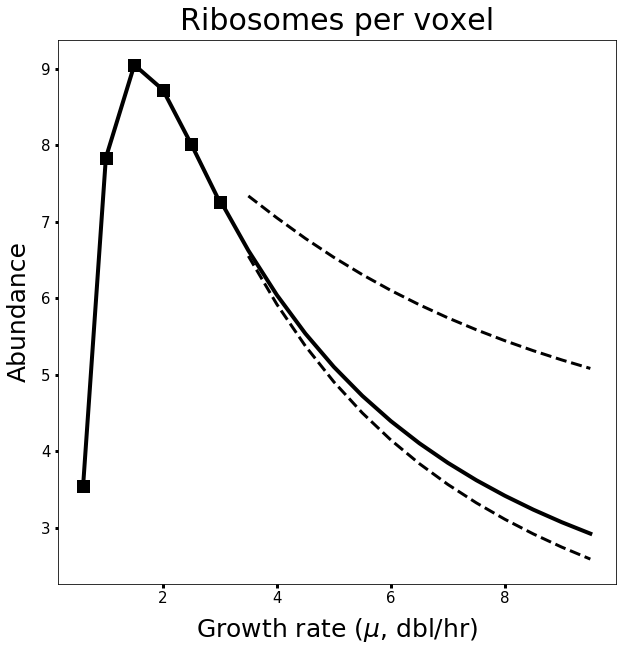

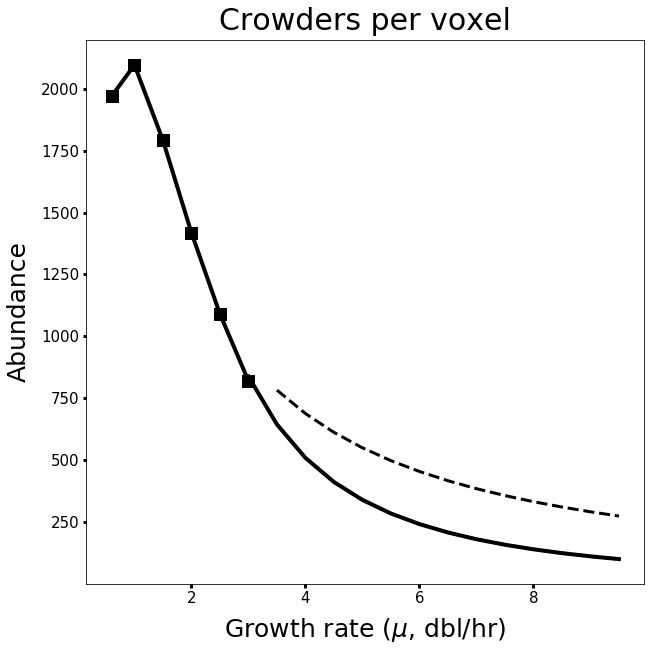

In [274]:
# Plot the values

# Values from our simulations:
n_crowd_vox_actual = np.array([1970.0, 2096.0, 1791.0, 1418.0, 1090.0, 820.0])
n_rib_vox_actual = np.array([3.5431368807732677, 7.83939708791492, 9.053235633635463, 
         8.728526590655443, 8.013776336457527, 7.258097524079424])

# Ribosomes
plt.plot(dr_actual,n_rib_vox_actual,label=r'$\mathregular{\phi_{ vox}}$',color='black',
         marker='s',markersize=8,markeredgewidth=5,linewidth=4)
plt.plot(dr_plot[5:-1], rib_vox[5:-1],color='black',linewidth=4)
plt.plot(dr_plot[6:-1], rib_vox_max[6:-1],color='black',linestyle='dashed',linewidth=3)
plt.plot(dr_plot[6:-1], rib_vox_min[6:-1],color='black',linestyle='dashed',linewidth=3)
plt.rcParams["figure.figsize"] = (10,10)
plt.ylabel("Abundance",size=25,labelpad=10)
plt.xlabel("Growth rate ($\mu$, dbl/hr)",size=25,labelpad=10)
plt.title("Ribosomes per voxel",fontsize=30,pad=10)

plt.tick_params(axis='both', which='major',width=3, labelsize=15)
plt.show()

# Crowders
plt.plot(dr_actual,n_crowd_vox_actual,label=r'$\mathregular{\phi_{ vox}}$',color='black',
         marker='s',markersize=8,markeredgewidth=5,linewidth=4)
plt.plot(dr_plot[5:-1], crowd_vox[5:-1],color='black',linewidth=4)
plt.plot(dr_plot[6:-1], crowd_vox_max[6:-1],color='black',linestyle='dashed',linewidth=3)
plt.plot(dr_plot[6:-1], crowd_vox_min[6:-1],color='black',linestyle='dashed',linewidth=3)
plt.rcParams["figure.figsize"] = (10,10)
plt.ylabel("Abundance",size=25,labelpad=10)
plt.xlabel("Growth rate ($\mu$, dbl/hr)",size=25,labelpad=10)
plt.title("Crowders per voxel",fontsize=30,pad=10)

plt.tick_params(axis='both', which='major',width=3, labelsize=15)
plt.show()




In [268]:
rib_vox_min

array([1.57923591, 7.80520381, 9.00786114, 8.69847802, 8.01217465,
       7.28956516, 6.62732728, 6.04586681, 5.54195289, 5.10594936,
       4.72751027, 4.39733905, 4.10758101, 3.85175725, 3.62456819,
       3.42168296, 3.23955254, 3.07525502, 2.92637135, 2.79088679])

In [255]:
n_rib_vox_max

array([1.57923591, 7.80520381, 9.00786114, 8.69847802, 8.01217465,
       7.28956516, 6.62732728, 6.04586681, 5.54195289, 5.10594936,
       4.72751027, 4.39733905, 4.10758101, 3.85175725, 3.62456819,
       3.42168296, 3.23955254, 3.07525502, 2.92637135, 2.79088679])

In [258]:
n_rib_vox[5:-1]

array([7.28956516, 6.62732728, 6.04586681, 5.54195289, 5.10594936,
       4.72751027, 4.39733905, 4.10758101, 3.85175725, 3.62456819,
       3.42168296, 3.23955254, 3.07525502, 2.92637135])

In [259]:
n_rib_vox_actual

array([3.54313688, 7.83939709, 9.05323563, 8.72852659, 8.01377634,
       7.25809752])

In [262]:
n_rib_vox_temp

array([[1.57923591, 7.80520381, 9.00786114, 8.69847802, 8.01217465,
        7.28956516, 6.62732728, 6.04586681, 5.54195289, 5.10594936,
        4.72751027, 4.39733905, 4.10758101, 3.85175725, 3.62456819,
        3.42168296, 3.23955254, 3.07525502, 2.92637135, 2.79088679],
       [1.57923591, 7.80520381, 9.00786114, 8.69847802, 8.01217465,
        7.28956516, 6.62732728, 6.04586681, 5.54195289, 5.10594936,
        4.72751027, 4.39733905, 4.10758101, 3.85175725, 3.62456819,
        3.42168296, 3.23955254, 3.07525502, 2.92637135, 2.79088679],
       [1.57923591, 7.80520381, 9.00786114, 8.69847802, 8.01217465,
        7.28956516, 6.62732728, 6.04586681, 5.54195289, 5.10594936,
        4.72751027, 4.39733905, 4.10758101, 3.85175725, 3.62456819,
        3.42168296, 3.23955254, 3.07525502, 2.92637135, 2.79088679],
       [1.57923591, 7.80520381, 9.00786114, 8.69847802, 8.01217465,
        7.28956516, 6.62732728, 6.04586681, 5.54195289, 5.10594936,
        4.72751027, 4.39733905, 4.10758101, 3

In [264]:
phi_rib_temp

array([[0.01354596, 0.09055046, 0.14027154, 0.17473212, 0.19986533,
        0.21891665, 0.23213131, 0.24220734, 0.24997695, 0.25600639,
        0.26069339, 0.2643249 , 0.26711276, 0.26921655, 0.27075857,
        0.27183407, 0.27251821, 0.27287107, 0.27294121, 0.27276825],
       [0.01354944, 0.0907517 , 0.14061645, 0.17501486, 0.19988987,
        0.21853379, 0.2312464 , 0.24076767, 0.2479614 , 0.25341669,
        0.25754718, 0.2606505 , 0.2629453 , 0.26459508, 0.26572405,
        0.26642784, 0.266781  , 0.26684229, 0.26665846, 0.26626705],
       [0.01354596, 0.09055046, 0.14027154, 0.17473212, 0.19986533,
        0.21891665, 0.23213131, 0.24220734, 0.24997695, 0.25600639,
        0.26069339, 0.2643249 , 0.26711276, 0.26921655, 0.27075857,
        0.27183407, 0.27251821, 0.27287107, 0.27294121, 0.27276825],
       [0.01354596, 0.09055046, 0.14027154, 0.17473212, 0.19986533,
        0.21891665, 0.23213131, 0.24220734, 0.24997695, 0.25600639,
        0.26069339, 0.2643249 , 0.26711276, 0